# Control Flow

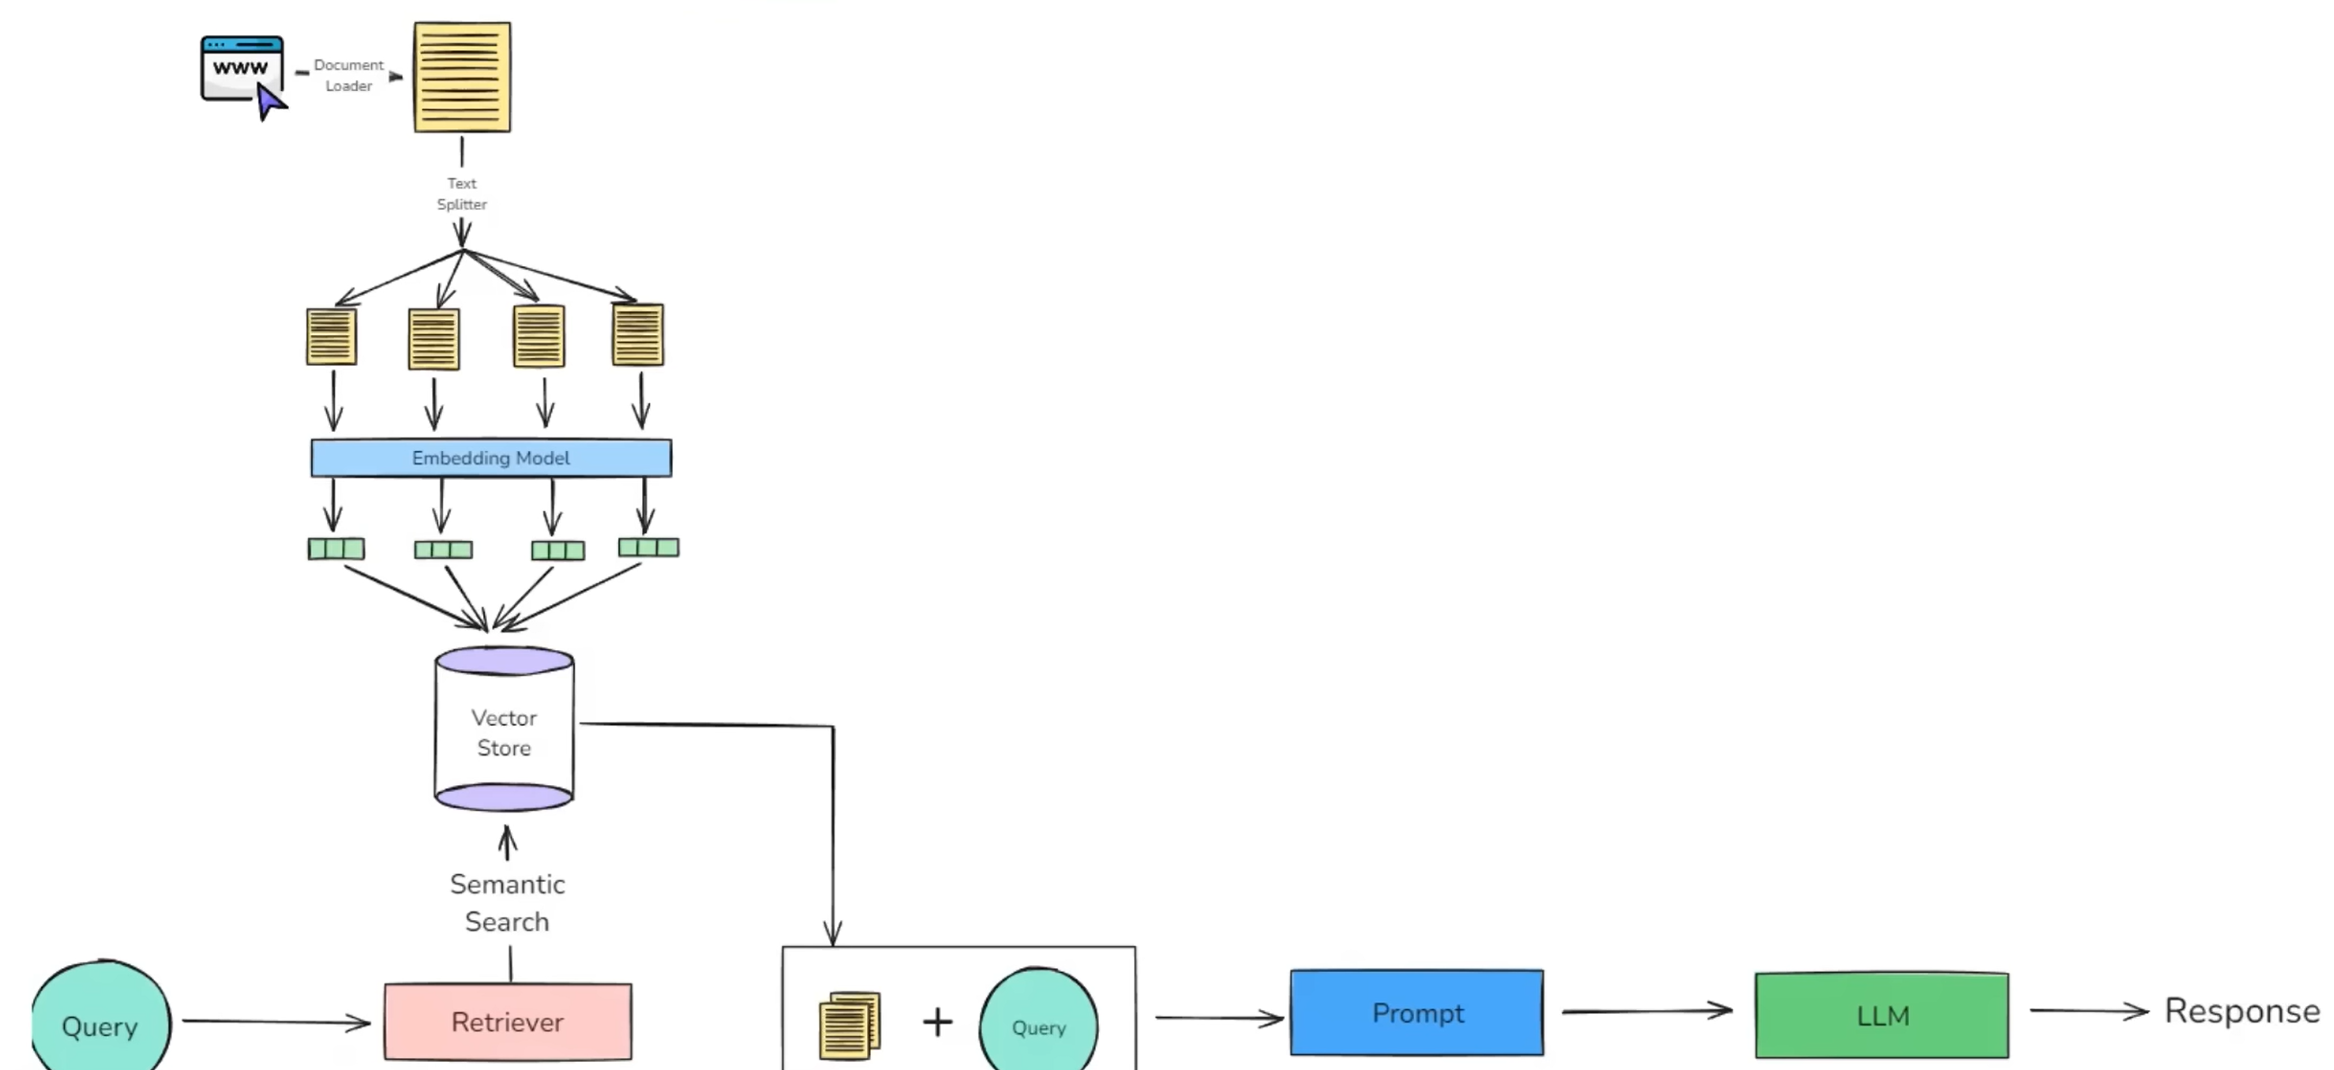

# code

In [141]:
from youtube_transcript_api import YouTubeTranscriptApi, TranscriptsDisabled

from langchain_text_splitters import RecursiveCharacterTextSplitter

from langchain_openai import OpenAIEmbeddings

from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document

from langchain_openai import ChatOpenAI

from langchain_core.prompts import PromptTemplate

from dotenv import load_dotenv
import os

In [103]:
load_dotenv()

True

In [104]:
OPEN_AI_KEY = os.getenv("OPEN_AI_KEY")

### Step 1. fetching video transcript

In [72]:
video_id = "BFU1OCkhBwo"
transcript_list = []
try:
    transcript_data = YouTubeTranscriptApi().fetch(video_id=video_id, languages=['en'])
    transcript_list = [text.text for text in transcript_data]
    transcript = ''.join(transcript_list)



except TranscriptsDisabled as e:
    print("No Caption is Available For this video: ", e)

In [73]:
transcript

'If you\'re worried about immigrationtaking jobs, you should be way moreworried about AI because it\'s like aflood of millions of new digitalimmigrants that are Nobel Prize levelcapability work at superhuman speed andwill work for less than minimum wage. Imean, we\'re heading for so muchtransformative change faster than oursociety is currently prepared to dealwith it. And there\'s a differentconversation happening publicly than theone that the AI companies are havingprivately about which world we\'reheading to, which is a future thatpeople don\'t want. But we didn\'t consentto have six people make that decision onbehalf of 8 billion people.>> Tristan Harris is one of the world\'smost influential technology ethicists>> who created the Center for HumaneTechnology after correctly predictingthe dangers social media would have onour society.>> And now he\'s warning us about thecatastrophic consequences AI will haveon all of us.>> Let me like collect myself for a second.We can\'t let it happ

In [74]:
len(transcript)

152484

### Step 1.1 Text Splitting

In [78]:
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
)

In [79]:
splitter

In [83]:
chunks = splitter.split_text(transcript)

In [85]:
len(chunks)

191

In [106]:
chunks

["If you're worried about immigrationtaking jobs, you should be way moreworried about AI because it's like aflood of millions of new digitalimmigrants that are Nobel Prize levelcapability work at superhuman speed andwill work for less than minimum wage. Imean, we're heading for so muchtransformative change faster than oursociety is currently prepared to dealwith it. And there's a differentconversation happening publicly than theone that the AI companies are havingprivately about which world we'reheading to, which is a future thatpeople don't want. But we didn't consentto have six people make that decision onbehalf of 8 billion people.>> Tristan Harris is one of the world'smost influential technology ethicists>> who created the Center for HumaneTechnology after correctly predictingthe dangers social media would have onour society.>> And now he's warning us about thecatastrophic consequences AI will haveon all of us.>> Let me like collect myself for a second.We can't let it happen. We",


### Step 1. Creating Embeddings

In [92]:
embeddings = OpenAIEmbeddings(
    api_key=OPEN_AI_KEY,
    model="text-embedding-3-large",
    base_url="https://openrouter.ai/api/v1",
)

### Step 1. Creating Vector Database

In [107]:
docs = [Document(page_content=chunk) for chunk in chunks]

In [108]:
docs

[Document(metadata={}, page_content="If you're worried about immigrationtaking jobs, you should be way moreworried about AI because it's like aflood of millions of new digitalimmigrants that are Nobel Prize levelcapability work at superhuman speed andwill work for less than minimum wage. Imean, we're heading for so muchtransformative change faster than oursociety is currently prepared to dealwith it. And there's a differentconversation happening publicly than theone that the AI companies are havingprivately about which world we'reheading to, which is a future thatpeople don't want. But we didn't consentto have six people make that decision onbehalf of 8 billion people.>> Tristan Harris is one of the world'smost influential technology ethicists>> who created the Center for HumaneTechnology after correctly predictingthe dangers social media would have onour society.>> And now he's warning us about thecatastrophic consequences AI will haveon all of us.>> Let me like collect myself for a s

In [110]:
vector_store = Chroma.from_documents(
    documents=docs,
    embedding=embeddings,
    persist_directory="./YouTube_ChatBot",
    collection_name="Transcript_collection",
)

In [111]:
vector_store

In [121]:
len(vector_store.get()['ids'])

191

In [122]:
vector_store.get()['ids'][0]

'4500455b-fc56-4751-99f1-f7a5197b5ea7'

In [130]:
vector_store.get(ids='4500455b-fc56-4751-99f1-f7a5197b5ea7')

{'ids': ['4500455b-fc56-4751-99f1-f7a5197b5ea7'],
 'embeddings': None,
 'documents': ["If you're worried about immigrationtaking jobs, you should be way moreworried about AI because it's like aflood of millions of new digitalimmigrants that are Nobel Prize levelcapability work at superhuman speed andwill work for less than minimum wage. Imean, we're heading for so muchtransformative change faster than oursociety is currently prepared to dealwith it. And there's a differentconversation happening publicly than theone that the AI companies are havingprivately about which world we'reheading to, which is a future thatpeople don't want. But we didn't consentto have six people make that decision onbehalf of 8 billion people.>> Tristan Harris is one of the world'smost influential technology ethicists>> who created the Center for HumaneTechnology after correctly predictingthe dangers social media would have onour society.>> And now he's warning us about thecatastrophic consequences AI will have

### Step 2. Retrieval

In [179]:
retriever = vector_store.as_retriever(search_type="mmr", search_kwargs={"k": 4})

In [180]:
retriever

VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000016080592910>, search_type='mmr', search_kwargs={'k': 4})

In [181]:
retriever.invoke(input="What is immigrationtaking")

[Document(metadata={}, page_content='laborjobs. What happens when AI immigrantscome in and take all of the cognitivelabor? If you\'re worried aboutimmigration, you should be way moreworried about AI.>> Like it dwarfs it. You can think of itlike this. I mean, if you think about umwe were sold a bill of goods in the1990s with NAFTA. We said, "Hey, we\'regoing to um NAFTA, the North AmericanFree Trade Agreement. We\'re going tooutsource all of our manufacturing tothese developing countries, China, youknow, Southeast Asia, and we\'re going toget this abundance. We\'re going to getall these cheap goods and it\'ll createthis world of abundance. Well, all of uswill be better off." But what did thatdo? Well, we did get all these cheapgoods. You can go to Walmart and go toAmazon and things are unbelievablycheap. But it hollowed out the socialfabric and the median worker is notseeing upward mobility. In fact, peoplefeel more pessimistic about that thanthan ever. And people can\'t buy theirown ho

### Step 3 Augmentation

In [140]:
llm = ChatOpenAI(
    api_key=OPEN_AI_KEY,
    model = 'gpt-3.5-turbo',
    base_url="https://openrouter.ai/api/v1",
    verbose=True,
)

In [142]:
prompt = PromptTemplate(
    template_format="f-string",
    template="""
        You are a helpful assistant.
        Answer ONLY from the provided transcript context.
        If the context is insufficient, just say you don't know.

        {context}
        Question: {question}
    """,
    input_variables=['context', 'question'],

)

In [145]:
prompt

PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="\n        You are a helpful assistant.\n        Answer ONLY from the provided transcript context.\n        If the context is insufficient, just say you don't know.\n\n        {context}\n        Question: {question}\n    ")

In [151]:
# testing

query = "What is immigrationtaking in jobs ?"
retrived_answer = retrieval.invoke(query)
len(retrived_answer)

4

In [152]:
retrived_answer

[Document(metadata={}, page_content='laborjobs. What happens when AI immigrantscome in and take all of the cognitivelabor? If you\'re worried aboutimmigration, you should be way moreworried about AI.>> Like it dwarfs it. You can think of itlike this. I mean, if you think about umwe were sold a bill of goods in the1990s with NAFTA. We said, "Hey, we\'regoing to um NAFTA, the North AmericanFree Trade Agreement. We\'re going tooutsource all of our manufacturing tothese developing countries, China, youknow, Southeast Asia, and we\'re going toget this abundance. We\'re going to getall these cheap goods and it\'ll createthis world of abundance. Well, all of uswill be better off." But what did thatdo? Well, we did get all these cheapgoods. You can go to Walmart and go toAmazon and things are unbelievablycheap. But it hollowed out the socialfabric and the median worker is notseeing upward mobility. In fact, peoplefeel more pessimistic about that thanthan ever. And people can\'t buy theirown ho

In [158]:
context_text = '\n\n'.join(answer.page_content for answer in retrived_answer)
context_text

'laborjobs. What happens when AI immigrantscome in and take all of the cognitivelabor? If you\'re worried aboutimmigration, you should be way moreworried about AI.>> Like it dwarfs it. You can think of itlike this. I mean, if you think about umwe were sold a bill of goods in the1990s with NAFTA. We said, "Hey, we\'regoing to um NAFTA, the North AmericanFree Trade Agreement. We\'re going tooutsource all of our manufacturing tothese developing countries, China, youknow, Southeast Asia, and we\'re going toget this abundance. We\'re going to getall these cheap goods and it\'ll createthis world of abundance. Well, all of uswill be better off." But what did thatdo? Well, we did get all these cheapgoods. You can go to Walmart and go toAmazon and things are unbelievablycheap. But it hollowed out the socialfabric and the median worker is notseeing upward mobility. In fact, peoplefeel more pessimistic about that thanthan ever. And people can\'t buy theirown homes. And all of this is because wedi

In [160]:
type(context_text)

str

In [163]:
final_prompt = prompt.invoke({"context": context_text, "question":query})

In [173]:
print(final_prompt.text)


        You are a helpful assistant.
        Answer ONLY from the provided transcript context.
        If the context is insufficient, just say you don't know.

        laborjobs. What happens when AI immigrantscome in and take all of the cognitivelabor? If you're worried aboutimmigration, you should be way moreworried about AI.>> Like it dwarfs it. You can think of itlike this. I mean, if you think about umwe were sold a bill of goods in the1990s with NAFTA. We said, "Hey, we'regoing to um NAFTA, the North AmericanFree Trade Agreement. We're going tooutsource all of our manufacturing tothese developing countries, China, youknow, Southeast Asia, and we're going toget this abundance. We're going to getall these cheap goods and it'll createthis world of abundance. Well, all of uswill be better off." But what did thatdo? Well, we did get all these cheapgoods. You can go to Walmart and go toAmazon and things are unbelievablycheap. But it hollowed out the socialfabric and the median worker

In [169]:
answer = llm.invoke(final_prompt)

In [170]:
answer

AIMessage(content='AI immigrants are being discussed, not human immigrants. It is mentioned that AI taking over cognitive labor is a bigger concern than immigration.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 973, 'total_tokens': 999, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 0.0005255, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 0.0004865, 'upstream_inference_completions_cost': 3.9e-05}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-3.5-turbo', 'system_fingerprint': None, 'id': 'gen-1766596511-iZt0JqDhFfomDlpEywPo', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b515b-84aa-7351-aa58-63001f4e9cc5-0', usage_metadata={'input

# Building Final Chain

In [220]:
from langchain_core.runnables import RunnableSequence, RunnableParallel, RunnableLambda, RunnablePassthrough

from langchain_core.output_parsers import StrOutputParser

In [244]:
def format_doc(retrieved_doc):
    context = "\n\n".join(doc.page_content for doc in retrieved_doc)
    return context

In [245]:
parallel_chain = RunnableParallel(
    {
        "question": RunnablePassthrough(),
        "context": retriever | RunnableLambda(format_doc)
    }
)

In [246]:
parallel_chain.invoke("What is AI immigrants come in")

{'question': 'What is AI immigrants come in',
 'context': 'laborjobs. What happens when AI immigrantscome in and take all of the cognitivelabor? If you\'re worried aboutimmigration, you should be way moreworried about AI.>> Like it dwarfs it. You can think of itlike this. I mean, if you think about umwe were sold a bill of goods in the1990s with NAFTA. We said, "Hey, we\'regoing to um NAFTA, the North AmericanFree Trade Agreement. We\'re going tooutsource all of our manufacturing tothese developing countries, China, youknow, Southeast Asia, and we\'re going toget this abundance. We\'re going to getall these cheap goods and it\'ll createthis world of abundance. Well, all of uswill be better off." But what did thatdo? Well, we did get all these cheapgoods. You can go to Walmart and go toAmazon and things are unbelievablycheap. But it hollowed out the socialfabric and the median worker is notseeing upward mobility. In fact, peoplefeel more pessimistic about that thanthan ever. And people 

In [247]:
parser = StrOutputParser()

In [248]:
main_chain = parallel_chain | prompt | llm | parser

In [249]:
main_chain.invoke("What is AI immigrants come in")

"I don't have enough context to provide an accurate answer."